<body>
    <h1>Course Project</h1>
    <p>Scraping a local job site for data scientist jobs in HK</p>
    <p>Cleaning the data and counting some key words</p>
</body>

In [70]:
import pandas as pd
import re
import math

In [71]:
df = pd.read_csv("ds_jobs_indeed_v01_20181101.csv")

In [72]:
df.shape #(128, 4)
#df.drop_duplicates().shape
df.drop_duplicates(keep = 'first', inplace=True)
df.shape

(80, 4)

In [75]:
def R_required(x):
    return x.str.contains(pat = "[^a-z]R[^a-z]", case = False)

def Python_required(x):
    return x.str.contains(pat = "Python", case = False)

df['R_required'] = R_required(df['job_text'])
df['Python_required'] = Python_required(df['job_text'])

In [76]:
#df[~ df['Python_required']].head()

In [77]:
df.shape

(80, 6)

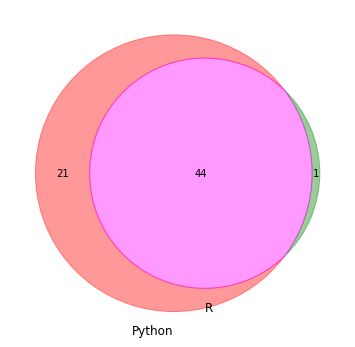

In [78]:
import matplotlib.pyplot as plt
from matplotlib_venn import venn2

plt.figure(figsize=(6,6))

Python_Required = set(df[df['Python_required']].index)
R_Required = set(df[df['R_required']].index)

v = venn2([Python_Required,R_Required], set_labels=('Python', 'R'))
v.get_patch_by_id('10').set_color('red')
v.get_patch_by_id('11').set_color('magenta')
v.get_patch_by_id('01').set_color('green')

plt.show()

Out of our 80 job postings 66 explicitely state **Python** or **R** as required. 44 jobs both mention Python and R, while 21 only require Python.

In [81]:
import seaborn as sns
df.head()

,job_title,company_name,details_link,job_text,R_required,Python_required
0,"Data Scientist, senior level",Terminal 1,https://www.indeed.hk/viewjob?jk=5096f6cd99709c3f,Responsibilities\r\nResponsible for the analyt...,True,True
1,"Data Scientist, Director- Financial Services A...",Cogs Agency HK,https://www.indeed.hk/viewjob?jk=1ab9ad946450576f,My client is a well- recognized investment fir...,False,False
2,Data Scientist,RADICA SYSTEMS LIMITED,https://www.indeed.hk/viewjob?jk=f1621540076157c1,"We love DATA, we believe DATA can make our lif...",True,True
3,Data Scientist,Hotmob Limited,https://www.indeed.hk/viewjob?jk=a59b9777a43f6a69,About Hotmob Limited\r\n\r\nEstablished in 200...,False,True
4,Data Scientist,Lab Viso Limited,https://www.indeed.hk/viewjob?jk=2dfb473af85953b5,"$32,000 a monthWe are looking for a talented D...",False,False


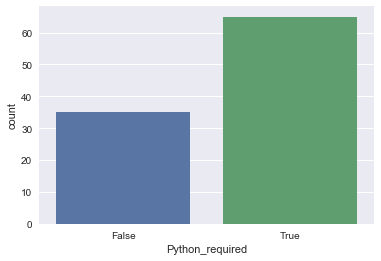

In [83]:
sns.set(style="darkgrid")
ax = sns.countplot(x=df['R_required'])
ax = sns.countplot(x=df['Python_required'])


In [21]:
b[0] = 99
c

([0, 1, 2], [99, 4, 5])

In [73]:


df['job_text'].str.match(".*Python.*")
df['job_text'].str.contains(pat = "Python", case = False)

#x = df['job_text'].str.contains(pat = " R[^a-z]", case = False)
#print(sum(x)) #43

# also finds R&D
y = df['job_text'].str.contains(pat = "[^a-z]R[^a-z]", case = False)
print(sum(y)) #47

#x = df['job_text'].str.contains(pat = " R&D", case = False)
#print(sum(x)) #43


#df[~ x & y]\
df[y]

47


,job_title,company_name,details_link,job_text
0,"Data Scientist, senior level",Terminal 1,https://www.indeed.hk/viewjob?jk=8fac5bf3bd04d950,Responsibilities\r\nResponsible for the analyt...
2,Data Scientist,RADICA SYSTEMS LIMITED,https://www.indeed.hk/viewjob?jk=f1621540076157c1,"We love DATA, we believe DATA can make our lif..."
3,Data Scientist - Media,MICHAEL PAGE,https://www.indeed.hk/viewjob?jk=6567706422d33abe,"As part of PageGroup, Michael Page is a leadin..."
5,Data Scientist,Cathay Pacific,https://www.indeed.hk/viewjob?jk=d92b5c3ca5f3d1f7,Department: Digital\r\nReports to: Operationa ...
6,Data Scientist,Neo Derm Ltd.,https://www.indeed.hk/viewjob?jk=8065aee734f99b7c,:\r\nUndertake processing of structure and uns...
7,Data Scientist,AXA,https://www.indeed.hk/viewjob?jk=b3b7b9e98a61c1fa,- Data Scientist (180003VK)\r\nJOB DESCRIPTION...
9,"Data Scientist (NLP, Deep Learning, Text Analy...",Thinkcol.AI,https://www.indeed.hk/viewjob?jk=dec891350591d503,"$15,000 - $30,000 a monthRoles and responsibil..."
10,Data Scientist,AUREXIA Consulting,https://www.indeed.hk/viewjob?jk=608c233395777324,Aurexia is a European and Asian based business...
20,Data Scientist,Asia Miles,https://www.indeed.hk/viewjob?jk=c1c83d3135356139,"Data Scientist\r\n\r\nDepartment\r\nInsight, A..."
22,Data Scientist,SOUTH CHINA MORNING POST PUBLISHERS LTD,https://www.indeed.hk/viewjob?jk=d1e710d3d5a4d45b,Purpose of the position:\r\n\r\nThe Data Analy...
